In [1]:
# Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import statsmodels.formula.api as sm_formula
import statsmodels.api as sm
from scipy import stats
import scipy
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Check that the sum of squares of N(0,1) follows a chi-square distribution

In [2]:
m=5000 # samples of N(0,1)
n=7   # degrees of freedom

In [3]:
sample = np.random.normal(0, 1, m*n).reshape(m,n)
sample2 = sample*sample

count    5000.000000
mean        6.991455
std         3.699069
min         0.099089
25%         4.246220
50%         6.333327
75%         9.047932
max        28.406071
dtype: float64

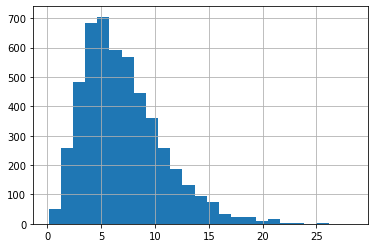

In [4]:
sums = sample2.sum(axis=1)
pd.Series(sums).hist(bins=25)
pd.Series(sums).describe()

count    5000.000000
mean        6.927249
std         3.713117
min         0.158118
25%         4.203886
50%         6.252757
75%         9.012420
max        26.281320
dtype: float64

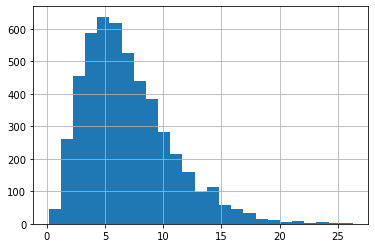

In [5]:
sample3 = np.random.chisquare(n,m)
pd.Series(sample3).hist(bins=25)
pd.Series(sample3).describe()

### Check that from the ratio of a z distribution and the root of a chi-square distribution we obtain a t distribution

In [6]:
m=5000 # samples of N(0,1)
n=7   # degrees of freedom

In [7]:
samplez = np.random.normal(0, 1, m)
samplechi2 = np.random.chisquare(n,m)
samplechi2n = np.sqrt(np.random.chisquare(n,m)/n)
t = samplez / samplechi2n

count    5000.000000
mean        0.012007
std         1.176430
min        -6.654343
25%        -0.727111
50%         0.016790
75%         0.724746
max         6.826378
dtype: float64

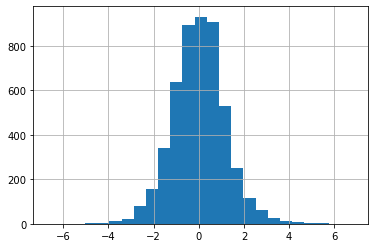

In [8]:
pd.Series(t).hist(bins=25)
pd.Series(t).describe()

In [9]:
samplet = np.random.standard_t(n, m)

count    5000.000000
mean        0.015669
std         1.212696
min        -7.896950
25%        -0.717326
50%         0.007816
75%         0.741830
max        12.190787
dtype: float64

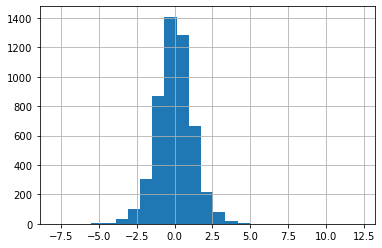

In [10]:
pd.Series(samplet).hist(bins=25)
pd.Series(samplet).describe()

### Punctual estimation

In [11]:
nterm = [587,470,676,451,436,672,584,697,408]

In [12]:
np.mean(nterm)

553.4444444444445

In [13]:
np.std(nterm,ddof=1)

114.09876326138587

In [14]:
np.std(nterm,ddof=1)/np.sqrt(len(nterm))

38.03292108712862

### Confidence interval for the mean, stdev unknown

In [15]:
nterm = [587,470,676,451,436,672,584,697,408]
n = 9
sigma = 100

In [16]:
scipy.stats.norm.ppf(0.975)

1.959963984540054

In [17]:
np.mean(nterm) + scipy.stats.norm.ppf(0.975)*sigma/np.sqrt(n)

618.7765772624463

In [18]:
np.mean(nterm) + scipy.stats.t.ppf(0.975,8)*np.std(nterm,ddof=1)/np.sqrt(n)

641.1485177387609

In [19]:
scipy.stats.t.cdf(3,8)

0.9914641593831087

### Check that the quotient of two chi-square distributions divided by its degrees of freedom is a F distribution

In [20]:
m=5000 # samples of N(0,1)
n1=5   # degrees of freedom
n2=7 

In [21]:
samplechi2n1 = np.random.chisquare(n1,m)
samplechi2n2 = np.random.chisquare(n2,m)
f = (samplechi2n1 / n1) / (samplechi2n2 / n2)

count    5000.000000
mean        1.411335
std         1.589890
min         0.007822
25%         0.534849
50%         0.979947
75%         1.734913
max        32.869273
dtype: float64

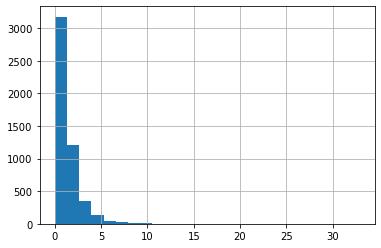

In [22]:
pd.Series(f).hist(bins=25)
pd.Series(f).describe()

count    5000.000000
mean        1.405677
std         1.782557
min         0.010438
25%         0.533694
50%         0.946614
75%         1.715853
max        53.928547
dtype: float64

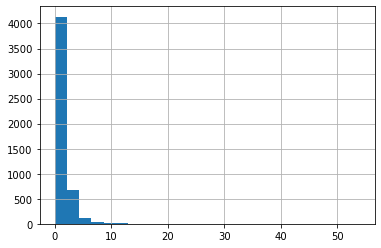

In [23]:
samplef = np.random.f(n1, n2, m)
pd.Series(samplef).hist(bins=25)
pd.Series(samplef).describe()

In [24]:
scipy.stats.f.ppf(0.99,10,5)

10.05101721957127

In [25]:
1-scipy.stats.f.cdf(10.05,10,5)

0.01000227680994581

In [26]:
scipy.stats.t.cdf(2.58,148)

0.9945733337151855